In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [11]:
df=pd.read_csv('C:/Users/ALVIN OKORO-IJAGHA/Downloads/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
print(df.shape)
print(df.columns)

x_train = df.drop('Outcome', axis=1)
y_train = df['Outcome']
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"After split - Shape of X_train: {X_train.shape}")
print(f"After split - Shape of X_test: {x_test.shape}")
print(f"After split - Shape of y_train: {Y_train.shape}")
print(f"After split - Shape of y_test: {y_test.shape}")



# If you're using these in gradient descent, make sure to convert to numpy arrays:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

print(f"Shape of X_train_np: {X_train.shape}")
print(f"Shape of y_train_np: {y_train.shape}")

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Shape of x_train: (768, 8)
Shape of y_train: (768,)
After split - Shape of X_train: (614, 8)
After split - Shape of X_test: (154, 8)
After split - Shape of y_train: (614,)
After split - Shape of y_test: (154,)
Shape of X_train_np: (614, 8)
Shape of y_train_np: (768,)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Now use X_train_scaled instead of X_train in gradient descent

#Manual implementation of z-score normalization

#def z_score_normalize(x):
 #   mean=np.mean(x,axis=0)
 #   std=np.std(x,axis=0)
  #  z=(x-mean)/std
  #  return z

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))
#We used -np.clip(-250,250) because we want the input to np.exp to be from -250 to 250 in order to prevent numerical underflowing or overflowing issues, especailly with large positive or negative inputs being inserted into np.exp

In [15]:
#Vectorized version of the cost function

def compute_cost(x, y, w, b, lambda_=1):
    m = x.shape[0]
    z = np.dot(x, w) + b
    fwb = sigmoid(z)
    epsilon = 1e-15  # small value to avoid log(0)
    cost = -np.mean(y * np.log(fwb + epsilon) + (1 - y) * np.log(1 - fwb + epsilon))
    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
    return cost + reg_cost

#The vectorized version performs all these operations in a single pass over the data
#For large datasets, this difference between a vectorized verson and a for loop version can be substantial.

In [16]:
def compute_gradient(x,y,w,b,lambda_):
    m,n=x.shape
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        fwb=sigmoid(np.dot(x[i], w) + b)
        err=fwb-y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db+=err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    for j in range(n):
        dj_dw[j]=dj_dw[j]+(lambda_/m)*w[j]
    
    return dj_dw,dj_db


In [17]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function,lambda_):
    
    m, n = x.shape
    J_history=[]
    p_history=[]
    w=w_in#np.array(w_in)
        
    b=b_in
    
    for i in range(num_iters):
        dj_dw,dj_db=gradient_function(x,y,w,b,lambda_)
        
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i < 10000:
            J_history.append(cost_function(x,y,w,b,lambda_))
            p_history.append([w,b])
        if i % (num_iters // 10) == 0:
                print(f'Iteration {i:4}: Cost {J_history[-1]:0.2e}, '
                      f'dj_db: {dj_db:0.3e}, b: {b:0.5e}')
                print(f'dj_dw: {dj_dw}')
                print(f'w: {w}')
                
    return w,b,J_history,p_history

In [18]:
n = X_train_scaled.shape[1]  # number of features
w_init = np.zeros(n) # Basically an array of zeros of length maybe 5. Since there are multiple features.
b_init = 0
lambda_ = 0.1
iterations = 3000
alpha = 0.1 

# Perform gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_train_scaled, Y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient, lambda_)
print(f'(w,b) found by gradient descent: {w_final}, {b_final:8.4f}')

Iteration    0: Cost 6.80e-01, dj_db: 1.531e-01, b: -1.53094e-02
dj_dw: [-0.09879095 -0.21710507 -0.03905261 -0.02756524 -0.05164325 -0.14581114
 -0.07356821 -0.13358737]
w: [0.0098791  0.02171051 0.00390526 0.00275652 0.00516432 0.01458111
 0.00735682 0.01335874]
Iteration  300: Cost 4.69e-01, dj_db: 3.034e-03, b: -8.53280e-01
dj_dw: [-1.48978276e-05 -4.98625568e-03  2.68350739e-03 -1.15540321e-03
  3.24313235e-03 -4.10713970e-03 -3.48576178e-04 -1.22493415e-03]
w: [ 0.21503172  1.01667892 -0.21716927  0.02270075 -0.1581311   0.73988876
  0.22969105  0.40736352]
Iteration  600: Cost 4.68e-01, dj_db: 2.985e-04, b: -8.87304e-01
dj_dw: [ 2.93076310e-05 -6.57281038e-04  3.42634800e-04 -3.00770321e-04
  4.99436493e-04 -3.94304814e-04 -2.39815227e-05 -1.69278300e-04]
w: [ 0.21420807  1.07921408 -0.25088132  0.04278486 -0.20173911  0.78701205
  0.23312392  0.4231987 ]
Iteration  900: Cost 4.68e-01, dj_db: 3.618e-05, b: -8.90997e-01
dj_dw: [ 7.57551843e-06 -9.89961972e-05  4.58908696e-05 -5.8

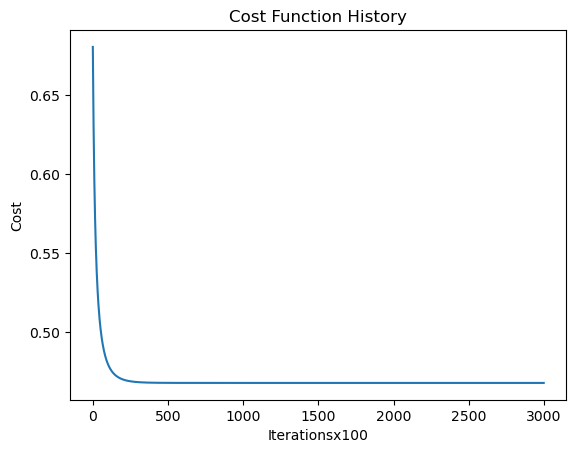

In [19]:
# Plot cost function history
import matplotlib.pyplot as plt
plt.plot(J_hist)
plt.xlabel('Iterationsx100')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

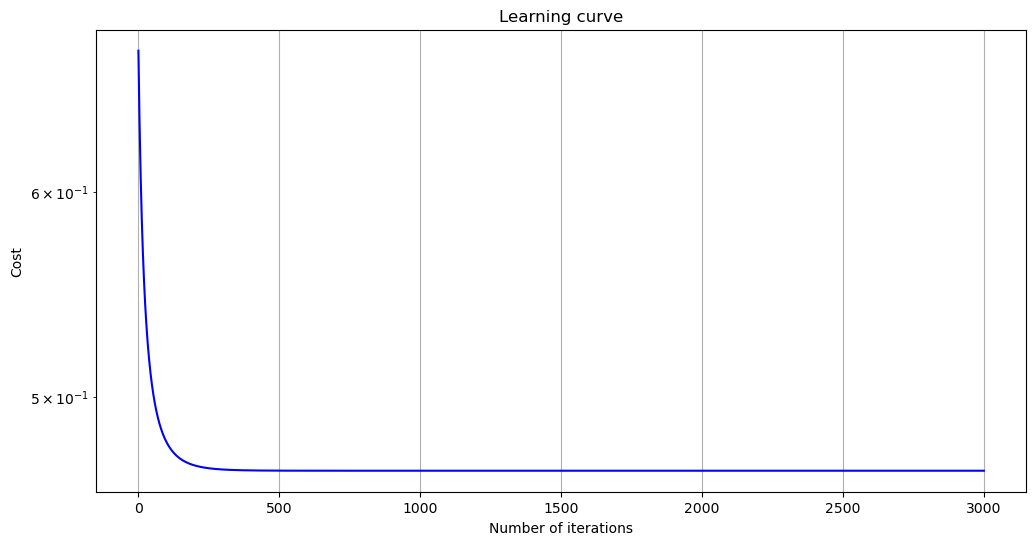

In [20]:
#Learning curve
plt.figure(figsize=(12, 6))
plt.plot(range(iterations), J_hist, 'b-')
plt.title('Learning curve')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.yscale('log')  # setting y-axis to a log scale in order to better visualize the cost changes
plt.grid(True)
plt.show()


In [21]:
def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b) >= 0.5

# Predict on test set
x_test_scaled = scaler.transform(x_test)  # Make sure to scale test data
y_pred = predict(x_test_scaled, w_final, b_final)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


# This will bring a table that summarizes the performance of the classification model. In this case it will be 2x2 matrix, since it's binary classifiaction.

#Positives (TP): Correctly predicted positive cases True Negatives (TN): Correctly predicted negative cases False Positives (FP): Negative cases incorrectly predicted as positive False Negatives (FN): Positive cases incorrectly predicted as negative


Test Accuracy: 0.7532
Confusion Matrix:
[[79 20]
 [18 37]]


C:\Users\ALVIN OKORO-IJAGHA\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


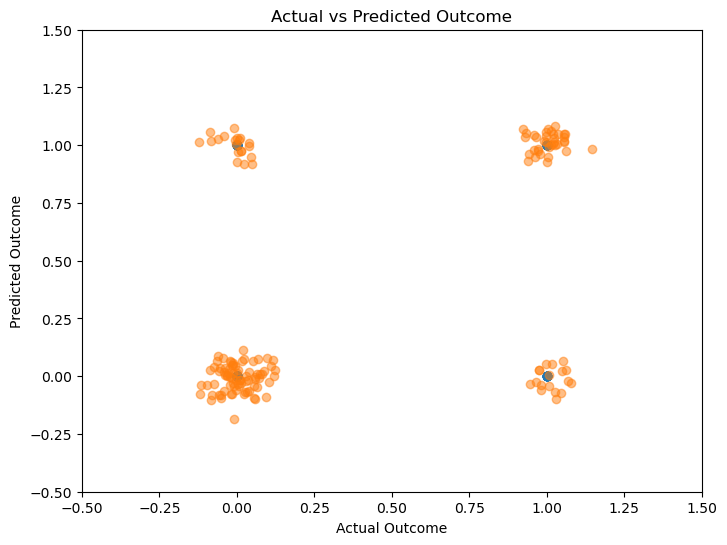

In [22]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Actual vs Predicted Outcome')
# Add jitter to better visualize overlapping points
plt.scatter(y_test + np.random.normal(0, 0.05, len(y_test)), 
            y_pred + np.random.normal(0, 0.05, len(y_pred)), 
            alpha=0.5)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

#The plot is visualizing the results of a binary classification model. In this case:

#0 represents "no diabetes"
#1 represents "has diabetes"

#Thw plot shows:

#Perfect predictions would fall on the points (0,0) and (1,1)
#Points at (0,1) are false positives (predicted diabetes when there wasn't)
#Points at (1,0) are false negatives (predicted no diabetes when there was)
